In [2]:
import numpy as np
import pandas as pd
import warnings
import os
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
order_data_path = '.\eleme_round1_testB\order'
filename = 'order_20200301.txt'
order_data = pd.read_csv(os.path.join(order_data_path,filename))

### Plot

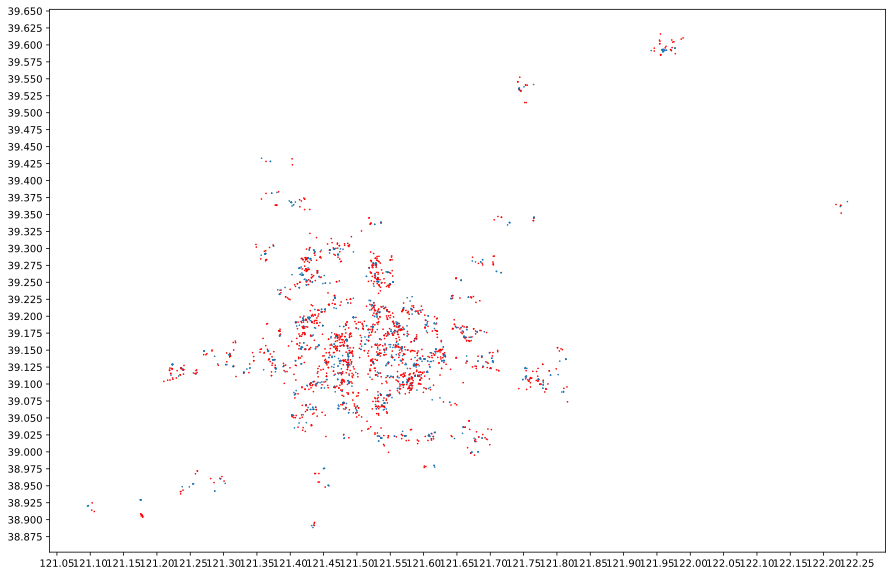

In [4]:
plt.axis = 'equal'
plt.figure(figsize=(15,10))
# plt.figure(dpi = 1000)
plt.xticks(np.arange(121,122.4,0.05))
plt.yticks(np.arange(38.8,39.7,0.025))
order_data[order_data['wave_index'] == 1].iloc[1]['courier_id']
data = order_data[order_data['wave_index'] == 1]
plt.scatter(data['pick_lng'],data['pick_lat'],s=0.5)
plt.scatter(data['deliver_lng'],data['deliver_lat'],s=0.5, c='r')

### Zoning and Sample a small batch of orders as a case

In [5]:
def zoning_from_date(data, lng1, lng2, lat1, lat2):
    data = data.drop(columns= ['tracking_id', 'weather_grade', 'create_time', 'confirm_time', 'assigned_time', 'aoi_id'])
    zoned_data = data[(lng1 <= data['pick_lng']) &
                      (lng2 >= data['pick_lng']) &
                      (lat1 <= data['pick_lat']) &
                      (lat2 >= data['pick_lat'])].copy(deep = True)
    return zoned_data

def sample_from_data(data, case_num, courier_num):
    cases = []; iloc1 = 0; iloc2 = 0
    for i in range(case_num):
        ccount = 1
        curname = data.iloc[iloc1]['courier_id']
        while ccount <= courier_num: #find the the right indexes to select
            iloc2 += 1
            if  data.iloc[iloc2]['courier_id'] != curname:
                curname = data.iloc[iloc2]['courier_id']
                ccount += 1
        cases.append(data.iloc[iloc1:iloc2].copy(deep = True))
        iloc1 = iloc2
    return cases

,courier_id,wave_index,pick_lng,pick_lat,deliver_lng,deliver_lat,promise_deliver_time,estimate_pick_time,shop_id
696,10487413,1,121.528068,39.277275,121.521034,39.282261,1583044200,1583041517,3c8fd900b62387b5191dc1c75d2d4b67
697,10487413,1,121.529260,39.276849,121.521744,39.280421,1583043124,1583042167,488a838ddfaa4d1325cf72e6f21b9a87
698,10487413,1,121.529079,39.275436,121.525124,39.292461,1583044045,1583042312,fba500d583e422f16662dbd3b9a10a7d
699,10487413,1,121.528859,39.276883,121.520574,39.294691,1583044271,1583042113,a7b5043c4129c7542bd73bd71f6e2ff8
1351,110812290,1,121.528068,39.277275,121.549904,39.282861,1583032500,1582979278,3c8fd900b62387b5191dc1c75d2d4b67
1352,110812290,1,121.528068,39.277275,121.552184,39.288851,1583032500,1582981532,3c8fd900b62387b5191dc1c75d2d4b67
1353,110812290,1,121.528068,39.277275,121.549904,39.282861,1583031600,1582994558,3c8fd900b62387b5191dc1c75d2d4b67
1354,110812290,1,121.528068,39.277275,121.552564,39.283301,1583037188,1583032367,3c8fd900b62387b5191dc1c75d2d4b67
1355,110812290,1,121.528004,39.276442,121.551824,39.287211,1583031898,1583029881,4d8a4df0f1ebb39388cd8b60cab7a251
1526,114323969,1,121.528068,39.277275,121.531894,39.262131,1583039128,1583031928,3c8fd900b62387b5191dc1c75d2d4b67


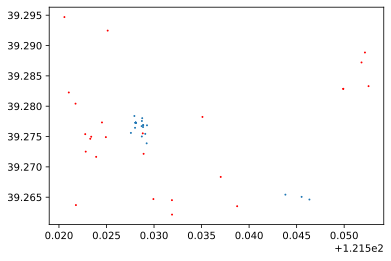

In [102]:
data_section = order_data[order_data['wave_index'] == 1]
courier_num = 5
case_num = 2
# divide a group of cases in a specific area by specify longitude and latitude.
llgt1 = (121.50, 121.57, 39.225, 39.3)
cases = sample_from_data(zoning_from_date(data_section,*llgt1), case_num, courier_num)
data = cases[1]
plt.scatter(data['pick_lng'],data['pick_lat'],s=1)
plt.scatter(data['deliver_lng'],data['deliver_lat'],s=1, c='r')
data

# Build 'nodes', 'distance_Matrix' from sampled data

In [80]:
def generate_nodes_data(data):
    nodes_data = data[['pick_lng','pick_lat','deliver_lng','deliver_lat','promise_deliver_time','estimate_pick_time','shop_id']].copy()
    nodes_data.loc[:,'order_id'] = range(0,len(data))

    # ----- rstr_data ------
    rstr_data = nodes_data[['pick_lng','pick_lat','order_id','estimate_pick_time','shop_id']].rename(columns={'pick_lng':'longitude','pick_lat':'latitude','estimate_pick_time':'time'})
    rstr_data['type'] = 101
    # pick n drone-base
    order_per_shop = data.groupby(['shop_id']).count()
    drone_base_list = order_per_shop.sort_values(by=['wave_index'],ascending = False)[0:3].index.tolist()
    rstr_data.loc[rstr_data['shop_id'].isin(drone_base_list),'type'] = 103
    rstr_data.drop(columns=['shop_id'], inplace=True)

    # ----- cstm_data ------
    cstm_data = nodes_data[['deliver_lng','deliver_lat','order_id','promise_deliver_time']].rename(columns={'deliver_lng':'longitude','deliver_lat':'latitude','promise_deliver_time':'time'})
    cstm_data['type'] = 201

    # ----- concat_data -----
    nodes_data = pd.concat([rstr_data,cstm_data])
    nodes_data.reset_index(drop=True, inplace=True)
    return nodes_data
nodes_data = generate_nodes_data(data)
nodes_data

,longitude,latitude,order_id,time,type
0,121.528064,39.277271,0,1583059131,103
1,121.528423,39.277015,1,1583056633,101
2,121.528423,39.277015,2,1583056738,101
3,121.528846,39.276562,3,1583057200,101
4,121.528817,39.277939,4,1583057374,101
5,121.528068,39.277275,5,1583062178,103
6,121.524285,39.278419,6,1583059346,101
7,121.527933,39.278386,7,1583059934,101
8,121.524378,39.278436,8,1583060198,101
9,121.528068,39.277275,9,1583064110,103


# Build distance matrix

In [109]:
import math
def ground_distance(lng1, lat1, lng2, lat2):
    COEFFICIENT = 1.4
    RADIUS = 6367000.0
    # 经度差值
    deltaLng = lng2 - lng1
    # 纬度差值
    deltaLat = lat2 - lat1
    # 平均纬度
    b = (lat1 + lat2) / 2.0
    # 东西距离
    x = math.radians(deltaLng) * RADIUS * math.cos(math.radians(b))
    # 南北距离
    y = RADIUS * math.radians(deltaLat)
    # 用平面的矩形对角距离公式计算总距离
    return math.sqrt(x * x + y * y)*COEFFICIENT

def drone_distance(lng1, lat1, lng2, lat2):
    RADIUS = 6367000.0
    deltaLng = lng2 - lng1
    deltaLat = lat2 - lat1
    b = (lat1 + lat2) / 2.0
    x = math.radians(deltaLng) * RADIUS * math.cos(math.radians(b))
    y = RADIUS * math.radians(deltaLat)
    return math.sqrt(x * x + y * y)

def cal_vehicle_matrix(nodes, vehicle_speed, vehicle_type='truck'):
    #Notice: Here Should plugin exNODES instead of NODES
    M = 1000
    n = nodes.shape[0] #the number of nodes
    lenthMatrix = np.zeros([n,n])
    if vehicle_type == 'drone':
        get_distance_matrix = drone_distance
        operate_time = 1.5
    else:
        get_distance_matrix = ground_distance
        operate_time = 1.5
    for i in range(n):
        for j in range(n):
            # lenthMatrix[i,j] = get_distance_matrix(nodes['longitude'][i], nodes['longitude'][i], nodes['longitude'][j], nodes['longitude'][j]) \
            #                    / vehicle_speed + operate_time
            lenthMatrix[i,j] = get_distance_matrix(nodes['longitude'][i], nodes['longitude'][i], nodes['longitude'][j], nodes['longitude'][j])
        if vehicle_type == 'drone':
            lenthMatrix[i,i] = 0
        else:
            lenthMatrix[i,i] = M
    return lenthMatrix


In [113]:
cal_vehicle_matrix(nodes_data,10)
drone_distance(121.50, 39.225, 121.57 , 39.3)

10282.768797437262

In [88]:
def test1(kk):
    print("test:" + str(kk))
a = test1
a('a')

test:a


Read Order data into dataframe

In [ ]:
for f in os.listdir(os.path.join(train_path, 'order')):
    date = f.split('.')[0].split('_')[1]
    df = pd.read_csv(os.path.join(train_path, 'order', f))
    df['date'] = date
    order_list.append(df)

In [9]:
os.listdir(".")

['.idea',
 'elemeDataExplore.ipynb',
 'eleme_round1_testB',
 'tianchi_elm_delivery']